## Buffer acetato

0.09825279085051666 0.001747209149483342


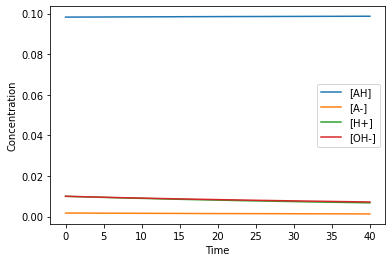

In [27]:
#my first program
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Presentacion del sistema a modelar/Planteamiento del modelo
# AH <-->A- + H+ 
# k1f=1.76*10.^(-5), 
# k1r=1

# H2O <--> H+ +OH-, 
# kwf=10.^(-14), 
# kwr=1;

# Planteamiento del modelo
# d[AH]/dt = -k1f*[AH]+k1r*[A-]*[H+]
# d[A]/dt = -k1f*[AH]+k1r*[A-]*[H+]
# d[H+]/dt = k1f*[AH]-k1r*[A-]*[H+]+kwf-kwr*[H+]*[OH-]
# d[OH-]/dt = kwf-kwr*[H+]*[OH-]

# P[0] = [AH],
# P[1] = [A-],
# P[2] = [H+],
# P[3] = [OH-],

#Declarando variables
k1f=1.76*10.**(-5)
k1r=1
kwf=10.**(-14)
kwr=1

def model(P, t):
    return [-k1f*P[0]+k1r*P[1]*P[2],
           k1f*P[0]-k1r*P[1]*P[2],
           k1f*P[0]-k1r*P[1]*P[2]+kwf-kwr*P[2]*P[3],
           kwf-kwr*P[2]*P[3]]

#Declarando las concentraciones iniciales de las variables
#Para ello obtener las concentraciones iniciales a pH 1 de las variables simuladas 
#usando la ecuación de Henderson Hasselbach
pH=2
pKa =3.75 #pka del ácido acético
ConcBuffer=0.1
#--> la concentración de ácido acético y su base conjugada a pH 1  y concentracion de buffer 0.1 M sera:

AHi=ConcBuffer/(1+(10**(pH-pKa)))
Ai=ConcBuffer-AHi

print(AHi,Ai)

#AHi=0.09998201
#Ai=0.0000179855
Hi=10.**(-pH)
OHi=10.**(-(14-pH))

suma=14
vol=0.01 #Valor de volumen en lt que se adicionara durante la simulación

ts = np.linspace(0, 40, 400) # de 0 a 12 con 100 puntos para t
P0 = [AHi,Ai,Hi,OHi+vol] #vector para los valores iniciales de los metabolitos
Ps = odeint(model, P0, ts) #Orden para integrar las ecuaciones diferenciales
AH = Ps[:,0]
A = Ps[:,1]
H = Ps[:,2]
OH = Ps[:,3]

plt.plot(ts, AH, label="[AH]")
plt.plot(ts, A, label="[A-]")
plt.plot(ts, H, label="[H+]")
plt.plot(ts, OH, label="[OH-]")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend();

In [60]:
#my first program
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Presentacion del sistema a modelar/Planteamiento del modelo
# AH <-->A- + H+ 
# k1f=1.76*10.^(-5), 
# k1r=1

# H2O <--> H+ +OH-, 
#kwf=10.^(-14), 
#kwr=1;

# Planteamiento del modelo
# d[AH]/dt = -k1f*[AH]+k1r*[A-]*[H+]
# d[A]/dt = -k1f*[AH]+k1r*[A-]*[H+]
# d[H+]/dt = k1f*[AH]-k1r*[A-]*[H+]+kwf-kwr*[H+]*[OH-]
# d[OH-]/dt = kwf-kwr*[H+]*[OH-]

# P[0] = [AH],
# P[1] = [A-],
# P[2] = [H+],
# P[3] = [OH-],




#Declarando las concentraciones iniciales de las variables
#Para ello obtener las concentraciones iniciales a pH 1 de las variables simuladas 
#usando la ecuación de Henderson Hasselbach

#--> la concentración de ácido acético y su base conjugada a pH 1  y concentracion de buffer 0.1 M sera:

def tritation(pH, pKa,ConcBuffer):
    AHi=ConcBuffer/(1+10**(pH-pKa))
    Ai=ConcBuffer-AHi
    #AHi=0.09998201
    #Ai=0.0000179855
    
    
    Hi=10.**(-pH)
    OHi=10.**(-(14-pH))
    trit=[]
#Declarando variables
    k1f=10.**(-pKa)
    k1r=1
    kwf=10.**(-14)
    kwr=1
    def model(P, t):
        return [-k1f*P[0]+k1r*P[1]*P[2],
               k1f*P[0]-k1r*P[1]*P[2],
               k1f*P[0]-k1r*P[1]*P[2]+kwf-kwr*P[2]*P[3],
               kwf-kwr*P[2]*P[3]]
    suma=14
    vol=0.01 #Valor de volumen en lt que se adicionara durante la simulación
    volacumulado=0.0
    for x in range(30):
        ts = np.linspace(0, 5000000000, 1000000) # de 0 a 12 con 100 puntos para t
        P0 = [AHi,Ai,Hi,OHi+vol] #vector para los valores iniciales de los metabolitos
        Ps = odeint(model, P0, ts) #Orden para integrar las ecuaciones diferenciales
        AH = Ps[:,0]
        A = Ps[:,1]
        H = Ps[:,2]
        OH = Ps[:,3]
        AHi=Ps[99999,0]
        Ai=Ps[99999,1]
        Hi=Ps[99999,2]
        OHi=Ps[99999,3]
        pHf=np.log10(1/Hi)
        pOHf=np.log10(1/OHi)
        volacumulado=volacumulado+vol
        trit.append([x+1,volacumulado,pHf,pOHf+pHf])
    return trit
pH=1
pKa =6.5 #pka del ácido acético
ConcBuffer=0.1    
data=tritation(pH, pKa,ConcBuffer)
print("complete")

complete


In [37]:
print(np.log10(1/10))

-1.0


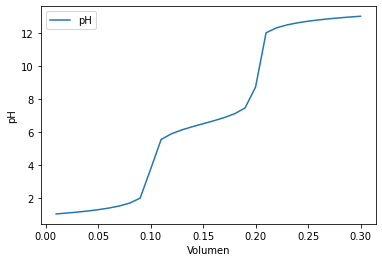

In [61]:
volumen=[]
pHs=[]
suma=[]
for element in data:
    volumen.append(element[1])
    pHs.append(element[2])
    suma.append(element[3])
    
plt.plot(volumen, pHs, label="pH")
plt.xlabel("Volumen")
plt.ylabel("pH")
plt.legend();

In [45]:
print(pHs)

[1.0456627197531607, 1.0966703618443585, 1.1544331056765824, 1.220999692165037, 1.2995070191465385, 1.3951022824657162, 1.5170696951846019, 1.6845491568808582, 1.944495286387589, 2.3936944354977365, 2.8654834323077765, 3.1707202677444286, 3.393976991977302, 3.581846060408431, 3.756129697554732, 3.9314291322780166, 4.123217751290288, 4.358093476313807, 4.713825193199106, 10.24931044822707, 12.00764165845603, 12.30486762618667, 12.479683437930227, 12.603983043962005, 12.70050912681914, 12.779434230810942, 12.846197969327298, 12.904052577336982, 12.955098250563022, 13.000770242821934]


In [62]:
print(suma)

[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.000000001124192, 14.000000549494075, 14.000000904147138, 13.999990000772026, 14.004596561174953, 13.999980945131426, 13.992098646709074, 13.975075802798997, 13.997332133338308, 11.948581462487853, 13.999121782566217, 13.999749752089542, 14.000065226878366, 13.999996050977359, 13.999997425192081, 13.99999244872163, 13.999991723868668, 13.999995908769861, 13.9999979419092, 13.99999891190463]


In [8]:
print(data[:][0])

[1, 0.01, 1.0444867394289725, 12.955513260571028]


In [2]:
from IPython.display import display, Math, Latex
display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

<IPython.core.display.Math object>

## Modelando Buffer fosfato

 $$ \mathrm{H_3PO_4} \xrightleftharpoons[k_{-1}]{k_1}\mathrm{H_2PO_4^{-}+ H^{+}}\xrightleftharpoons[k_{-2}]{k_2}\mathrm{HPO_4^{2-}+ H^{+}}\xrightleftharpoons[k_{-3}]{k_3}\mathrm{PO_4^{3-}+ H^{+}}$$

 $$ \mathrm{H_2O} \xrightleftharpoons[k_{w_r}]{k_{w_f}}\mathrm{OH^{-}+ H^{+}}$$
 
 $$ A+B \xrightleftharpoons{k_1}C$$
 


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Presentacion del sistema a modelar/Planteamiento del modelo
# H3PO4 <-k1-> H2PO4- + H+  <-k2-> HPO4-- + H+  <-k3-> PO4--- + H+
# k1f=log10(1/pka1)
# k1r=1
# k2f=log10(1/pka2)
# k2r=1
# k3f=log10(1/pka3)
# k3r=1

# H2O <--> H+ +OH-, 
# kwf=10.^(-14), 
# kwr=1;

# Planteamiento del modelo
# d[H3PO4]/dt = -k1f*[H3PO4]+k1r*[H2PO4-]*[H+]
# d[H2PO4-]/dt = k1f*[H3PO4]-k1r*[H2PO4-]*[H+]-k2f*[H2PO4-]+k2r*[HPO4--]*[H+]
# d[HPO4--]/dt = k2f*[H2PO4-]-k2r*[HPO4--]*[H+]-k3f*[HPO4--]+k3r*[PO4---]*[H+]
# d[PO4---]/dt = k3f*[HPO4--]-k3r*[PO4---]*[H+]

# d[H+]/dt =  k1f*[H3PO4]-k1r*[H2PO4-]*[H+]                                     kwf-kwr*[H+]*[OH-]
# d[OH-]/dt = kwf-kwr*[H+]*[OH-]

# P[0] = [AH],
# P[1] = [A-],
# P[2] = [H+],
# P[3] = [OH-],

pk1=
pk2=
pk3=


#Declarando variables
k1f=1.76*10.**(-5)
k1r=1
k2f=
k2r=
k3f=
k3r=
kwf=10.**(-14)
kwr=1

def model(P, t):
    return [-k1f*P[0]+k1r*P[1]*P[2],
           k1f*P[0]-k1r*P[1]*P[2],
           k1f*P[0]-k1r*P[1]*P[2]+kwf-kwr*P[2]*P[3],
           kwf-kwr*P[2]*P[3]]


dxdt(1) = -k1f*x(1)+k1r*x(2)*x(5);
dxdt(2) = k1f*x(1)-k1r*x(2)*x(5)-k2f*x(2)+k2r*x(3)*x(5);
dxdt(3) = k2f*x(2)-k2r*x(3)*x(5)-k3f*x(3)+k3r*x(4)*x(5);
dxdt(4) = k3f*x(3)-k3r*x(4)*x(5);
dxdt(5) = k1f*x(1)-k1r*x(2)*x(5)+k2f*x(2)-k2r*x(3)*x(5)+k3f*x(3)-k3r*x(4)*x(5)+kwf-kwr*x(5)*x(6);
dxdt(6) = kwf-kwr*x(5)*x(6);




#Declarando las concentraciones iniciales de las variables
#Para ello obtener las concentraciones iniciales a pH 1 de las variables simuladas 
#usando la ecuación de Henderson Hasselbach
pH=2
pKa =3.75 #pka del ácido acético
ConcBuffer=0.1
#--> la concentración de ácido acético y su base conjugada a pH 1  y concentracion de buffer 0.1 M sera:

AHi=ConcBuffer/(1+(10**(pH-pKa)))
Ai=ConcBuffer-AHi

print(AHi,Ai)

#AHi=0.09998201
#Ai=0.0000179855
Hi=10.**(-pH)
OHi=10.**(-(14-pH))

suma=14
vol=0.01 #Valor de volumen en lt que se adicionara durante la simulación

ts = np.linspace(0, 40, 400) # de 0 a 12 con 100 puntos para t
P0 = [AHi,Ai,Hi,OHi+vol] #vector para los valores iniciales de los metabolitos
Ps = odeint(model, P0, ts) #Orden para integrar las ecuaciones diferenciales
AH = Ps[:,0]
A = Ps[:,1]
H = Ps[:,2]
OH = Ps[:,3]

plt.plot(ts, AH, label="[AH]")
plt.plot(ts, A, label="[A-]")
plt.plot(ts, H, label="[H+]")
plt.plot(ts, OH, label="[OH-]")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend();